In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense , LSTM , Bidirectional , Embedding , TextVectorization , Conv1D , MaxPooling1D
from tensorflow.keras import Sequential
import os
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.preprocessing import MultiLabelBinarizer
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout, GlobalAveragePooling1D
import math as mt
from collections import Counter
import random
import statistics as st
from scipy.stats import skew , kurtosis
import seaborn as sns
from scipy.stats import f_oneway
from tensorflow.keras.layers import *
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder

In [32]:
df = pd.read_csv(
    os.path.join("text.csv")
)

In [33]:
df.head(10)

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
5,5,i was beginning to feel quite disheartened,0
6,6,i would think that whomever would be lucky eno...,2
7,7,i fear that they won t ever feel that deliciou...,1
8,8,im forever taking some time out to have a lie ...,5
9,9,i can still lose the weight without feeling de...,0


In [34]:
df.drop('Unnamed: 0' , axis=1 , inplace=True)
apply = df['text'].apply(lambda x : len(x.replace(" " , "")))
df['text_length'] = apply

In [35]:
df.head(10)

,text,label,text_length
0,i just feel really helpless and heavy hearted,4,38
1,ive enjoyed being able to slouch about relax a...,0,190
2,i gave up my internship with the dmrg and am f...,4,52
3,i dont know i feel so lost,0,20
4,i am a kindergarten teacher and i am thoroughl...,4,181
5,i was beginning to feel quite disheartened,0,36
6,i would think that whomever would be lucky eno...,2,101
7,i fear that they won t ever feel that deliciou...,1,100
8,im forever taking some time out to have a lie ...,5,57
9,i can still lose the weight without feeling de...,0,44


In [36]:
Emotion_values = df['label'].value_counts()
Maximum = Emotion_values.max()
Minimum = Emotion_values.min()
Skewness = skew(Emotion_values)
mean = np.mean(Emotion_values)
sd = st.stdev(Emotion_values)
quantiles = st.quantiles(Emotion_values)
Median = np.median(Emotion_values)
print(Emotion_values)
print(f'Maximum : Fear = {Maximum} , Minimum : Surprise = {Minimum}')
print(f'Skewness : {round(Skewness,4)}')
print(f'Quantiles : {quantiles}')
print(f'Standard Deviation : {round(sd,2)}')
print(f'Mean : {int(round(mean,0))} , Median : {int(Median)} ' )

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64
Maximum : Fear = 141067 , Minimum : Surprise = 14972
Skewness : 0.4997
Quantiles : [29658.5, 52514.5, 126157.0]
Standard Deviation : 50221.6
Mean : 69468 , Median : 52514 


In [37]:
x = df['text']
y = df[df.columns[1]].values
z = df['label']

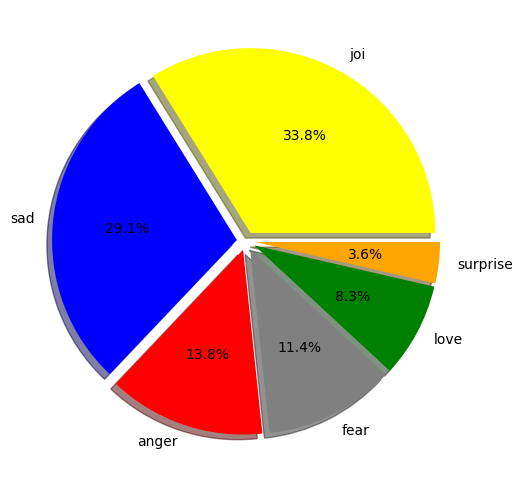

In [38]:
plt.figure(figsize=(6,6))
emotions = ['joi','sad','anger','fear','love','surprise']
colors = ['yellow','blue','red','grey','green','orange']
explode = []
num = 0.05
for j in range(0,6):
    explode.append(num)   
pie = plt.pie(
    Emotion_values , labels=emotions , colors=colors , autopct='%1.1f%%',
    shadow = True , explode=explode,)
plt.show()

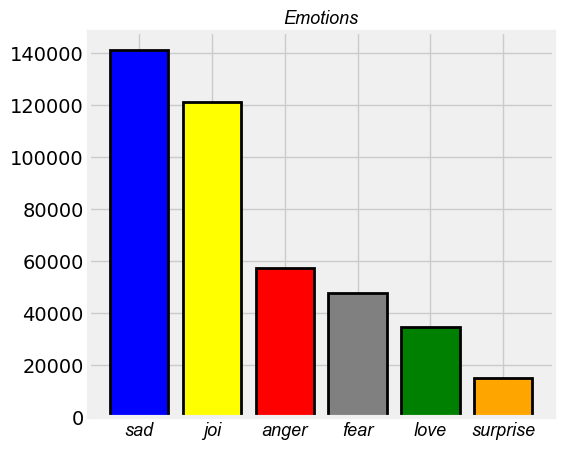

In [39]:
plt.figure(figsize=(6,5))
plt.style.use('fivethirtyeight')
emotions = ['sad','joi','anger','fear','love','surprise']
colors = ['blue','yellow','red','grey','green','orange']
hist = plt.bar(emotions , Emotion_values ,color=colors,linewidth=2 , edgecolor='black')
classes_num = np.arange(0,6)
plt.xticks(classes_num,emotions , fontname='Arial' , style='italic' , fontsize=13)
plt.title('Emotions' , fontname='Arial' , fontsize=13 , style='italic')
#plt.grid( color='black' , linestyle='--')
plt.show()

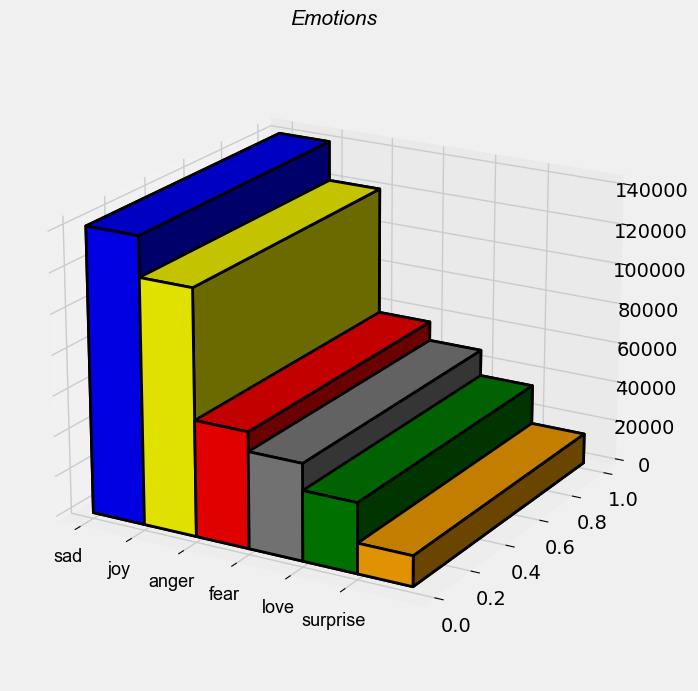

In [40]:
emotions = ['sad', 'joy', 'anger', 'fear', 'love', 'surprise']
colors = ['blue', 'yellow', 'red', 'grey', 'green', 'orange']
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x_pos = np.arange(len(emotions))
ax.bar3d(x_pos, np.zeros(len(emotions)), np.zeros(len(emotions)), 1, 1, Emotion_values, color=colors, edgecolor='black' , linewidth=2)
ax.set_xticks(x_pos)
ax.set_xticklabels(emotions, fontname='Arial', fontsize=13)
ax.set_title('Emotions' , fontname='Arial' , fontstyle='italic' , size=15)
ax.view_init(elev=20)
plt.show()

In [15]:
x

0             i just feel really helpless and heavy hearted
1         ive enjoyed being able to slouch about relax a...
2         i gave up my internship with the dmrg and am f...
3                                i dont know i feel so lost
4         i am a kindergarten teacher and i am thoroughl...
                                ...                        
416804    i feel like telling these horny devils to find...
416805    i began to realize that when i was feeling agi...
416806    i feel very curious be why previous early dawn...
416807    i feel that becuase of the tyranical nature of...
416808    i think that after i had spent some time inves...
Name: text, Length: 416809, dtype: object

In [16]:
TextVectorization?

Init signature:
TextVectorization(
    max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=None,
    pad_to_max_tokens=False,
    vocabulary=None,
    idf_weights=None,
    sparse=False,
    ragged=False,
    encoding='utf-8',
    **kwargs,
)
Docstring:     
A preprocessing layer which maps text features to integer sequences.

This layer has basic options for managing text in a Keras model. It
transforms a batch of strings (one example = one string) into either a list
of token indices (one example = 1D tensor of integer token indices) or a
dense representation (one example = 1D tensor of float values representing
data about the example's tokens). This layer is meant to handle natural
language inputs. To handle simple string inputs (categorical strings or
pre-tokenized strings) see `tf.keras.layers.StringLookup`.

The vocabulary for the layer must be either supplied on construction or


In [17]:
token_num = 200000
Vectorization = TextVectorization(
    standardize = 'lower_and_strip_punctuation',
    max_tokens = token_num,
    output_sequence_length = 1800,
    output_mode = 'int'                      
)

In [18]:
Vectorization.adapt(x)
Vector = Vectorization(x.values)

In [19]:
text = Vectorization('hello buddy')

In [20]:
text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([2817, 4782,    0, ...,    0,    0,    0], dtype=int64)>

In [21]:
Vector

<tf.Tensor: shape=(416809, 1800), dtype=int64, numpy=
array([[   2,   32,    3, ...,    0,    0,    0],
       [  73, 1168,   61, ...,    0,    0,    0],
       [   2,  840,   42, ...,    0,    0,    0],
       ...,
       [   2,    3,   47, ...,    0,    0,    0],
       [   2,    3,    9, ...,    0,    0,    0],
       [   2,   69,    9, ...,    0,    0,    0]], dtype=int64)>

In [22]:
Dataset = tf.data.Dataset.from_tensor_slices((Vector,y))
Dataset = Dataset.cache()
Dataset = Dataset.shuffle(417000)
Dataset = Dataset.batch(16)
Dataset = Dataset.prefetch(8)

In [23]:
total = len(Dataset)
train_size = int((total)*0.7)
test_size = int((total)*0.2)
val_size = int((total)*0.1)

In [24]:
total

26051

In [25]:
train = Dataset.take(train_size)
test = Dataset.skip(train_size).take(test_size)
val = Dataset.skip(train_size+test_size).take(val_size)

In [26]:
model = Sequential()
model.add(Embedding(token_num + 1, 128))
model.add(Dropout(0.1))
model.add(Conv1D(128 , 5 ,activation='relu'))
model.add(MaxPooling1D(pool_size=5))
model.add(Bidirectional(LSTM(128 , activation='tanh')))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=6, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         25600128  
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 128)         82048     
                                                                 
 max_pooling1d (MaxPooling1  (None, None, 128)         0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 256)               263168    
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 256)               

In [23]:
binary = BinaryCrossentropy()

In [24]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
model.fit(train,epochs=2,validation_data=val)

In [ ]:
comment = Vectorization('i am afraid of darkness')

In [ ]:
eval = model.evaluate(train)

In [402]:
prediction = model.predict(np.expand_dims(comment,0))
y_hat = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [403]:
dg = {0 : "sad" , 1 : "joi" , 2 : "love" , 3 : "anger" ,4 : "fear" ,5 : "surprise"}
dg

{0: 'sad', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

In [404]:
dg[y_hat]

'fear'

In [ ]:
st?

In [ ]:
plt.plot(model.history['loss'] , label = 'loss')
plt.plot(model.history['val_loss'] , label = 'validation_loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()
plt.legend
plt.plot(model.history['accuracy'] , label = 'accuracy')
plt.plot(model.history['accuracy_loss'] , label = 'accuracy_loss')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [28]:
df.info()

In [29]:
plt.bar?

In [24]:
df.tail(10)

,text,label,text_length
416799,i feel that i must confess even though it kill...,5,76
416800,i don t know why today i feel like it looks ve...,1,123
416801,i don t even feel like i fully resolved it but...,1,54
416802,i feel like i have been neglecting you my fait...,1,48
416803,i cry and feel a sense of loss when my patient...,1,192
416804,i feel like telling these horny devils to find...,2,107
416805,i began to realize that when i was feeling agi...,3,89
416806,i feel very curious be why previous early dawn...,5,72
416807,i feel that becuase of the tyranical nature of...,3,182
416808,i think that after i had spent some time inves...,5,110
